<a href="https://colab.research.google.com/github/dhruvbak/Testing-Evaluation/blob/main/Training%26Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment: Neural Network-Training And Evaluation 

#### 1. Importing all the important modules for the specific machine learning library

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import mean_squared_error

####  2. Loading the training and test dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

#### Data Preprocessing

In [ ]:
# converting y_train, y_test into 1D array from 2D array 
y_train = y_train.reshape(-1,) 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
# Normalising X_train and X_test
X_train = X_train / 255.0
X_test = X_test / 255.0

#### 3. Model Creation

#### Net A

In [ ]:
# creating class for neural network
class NetA:
    model1=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(10, activation='softmax')    
        ])
# model compilatation    
    model1.compile(optimizer='SGD',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
        

In [ ]:
# fitting the model , here testing data is used as validation data
historyA = NetA.model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9486 - accuracy: 0.3034 - val_loss: 1.8321 - val_accuracy: 0.3540
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8439 - accuracy: 0.3497 - val_loss: 1.8195 - val_accuracy: 0.3643
Epoch 3/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.8127 - accuracy: 0.3670 - val_loss: 1.8380 - val_accuracy: 0.3532
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7967 - accuracy: 0.3715 - val_loss: 1.9117 - val_accuracy: 0.3282
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7812 - accuracy: 0.3773 - val_loss: 1.8978 - val_accuracy: 0.3314
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7726 - accuracy: 0.3829 - val_loss: 1.8651 - val_accuracy: 0.3354
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7618 - accuracy: 0.3866 - val_loss: 1.8121 - val_accuracy:

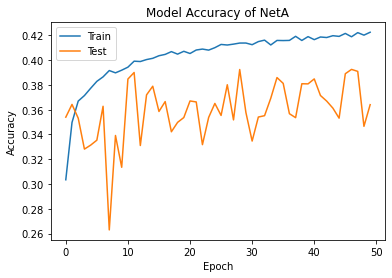

In [ ]:
# plotting training and test accuracies for model
plt.plot(historyA.history['accuracy'])
plt.plot(historyA.history['val_accuracy'])
plt.title('Model Accuracy of NetA')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#training and test accuracies for model
trainA=NetA.model1.evaluate(X_train, y_train)
testA=NetA.model1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 881us/step - loss: 1.8475 - accuracy: 0.3641


In [ ]:
NetA.model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


#### Net B

In [ ]:
# creating class for neural network
class NetB:
    model2=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # flattening image 
        layers.Dense(300, activation='relu'), # fully connected layer with 300 neuron with relu
        layers.Dense(10, activation='softmax') # fully connected output layer with 10 outputs      
    ])
# model compilatation
    model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fitting the model , here testing data is used as validation data
historyB= NetB.model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8788 - accuracy: 0.3287 - val_loss: 1.7451 - val_accuracy: 0.3772
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7012 - accuracy: 0.4012 - val_loss: 1.8587 - val_accuracy: 0.3506
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6300 - accuracy: 0.4277 - val_loss: 1.6028 - val_accuracy: 0.4392
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5774 - accuracy: 0.4448 - val_loss: 1.5685 - val_accuracy: 0.4522
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5339 - accuracy: 0.4609 - val_loss: 1.6518 - val_accuracy: 0.4157
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5003 - accuracy: 0.4756 - val_loss: 1.4888 - val_accuracy: 0.4775
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4667 - accuracy: 0.4856 - val_loss: 1.5500 - val_accurac

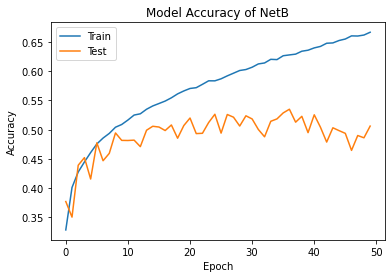

In [ ]:
# plotting training and test accuracies for model
plt.plot(historyB.history['accuracy'])
plt.plot(historyB.history['val_accuracy'])
plt.title('Model Accuracy of NetB')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#training and test accuracies for model
trainB=NetB.model2.evaluate(X_train, y_train)
testB=NetB.model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4642 - accuracy: 0.5061


In [ ]:
NetB.model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


#### Net C

In [ ]:
# creating class for neural network
class NetC:
    model3=models.Sequential([
        #convolution layer with kernel-width 5 and depth 25 andthe ReLU activation function
        layers.Conv2D(filters=32, kernel_size=(5, 25), activation='relu', input_shape=(32, 32, 3)), 
        layers.MaxPooling2D((2, 2)),#max-pool operation with kernel-width 2 and stride 2
        layers.Flatten(),# flattening image 
        layers.Dense(10, activation='softmax') #fully-connected output layer with 10 outputs
])
# model compilatation
    model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fitting the model
historyC= NetC.model3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.7721 - accuracy: 0.3685 - val_loss: 1.6197 - val_accuracy: 0.4218
Epoch 2/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5939 - accuracy: 0.4350 - val_loss: 1.5845 - val_accuracy: 0.4395
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5466 - accuracy: 0.4508 - val_loss: 1.5317 - val_accuracy: 0.4523
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5107 - accuracy: 0.4655 - val_loss: 1.5191 - val_accuracy: 0.4625
Epoch 5/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4806 - accuracy: 0.4768 - val_loss: 1.4619 - val_accuracy: 0.4877
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4459 - accuracy: 0.4900 - val_loss: 1.4278 - val_accuracy: 0.4918
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4137 - accuracy: 0.5039 - val_loss: 1.4324 -

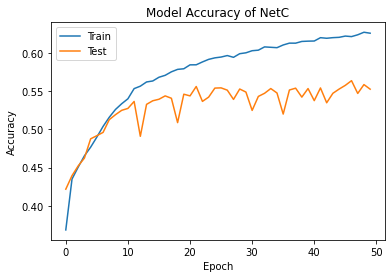

In [ ]:
# plotting training and test accuracies for model
plt.plot(historyC.history['accuracy'])
plt.plot(historyC.history['val_accuracy'])
plt.title('Model Accuracy of NetC')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#training and test accuracies for model
trainC=NetC.model3.evaluate(X_train, y_train)
testC=NetC.model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.3631 - accuracy: 0.5527


In [ ]:
NetC.model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 8, 32)         12032     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 4, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                17930     
Total params: 29,962
Trainable params: 29,962
Non-trainable params: 0
_________________________________________________________________


#### Summary of 3 models

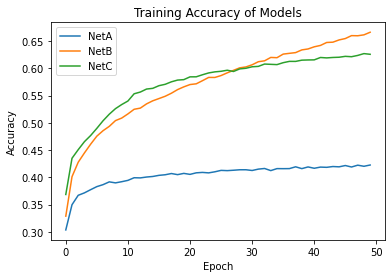

Training Accuracy of NetA :  0.39305999875068665
Training Accuracy of NetA :  0.6350399851799011
Training Accuracy of NetA :  0.6462399959564209


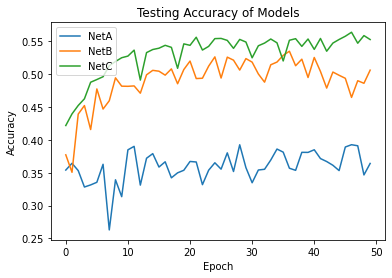

Testing Accuracy of NetA :  0.36410000920295715
Testing Accuracy of NetA :  0.5060999989509583
Testing Accuracy of NetA :  0.5526999831199646


In [ ]:
plt.plot(historyA.history['accuracy'])
plt.plot(historyB.history['accuracy'])
plt.plot(historyC.history['accuracy'])
plt.title('Training Accuracy of Models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['NetA', 'NetB','NetC'], loc='upper left')
plt.show()
print("Training Accuracy of NetA : ", trainA[1])  
print("Training Accuracy of NetA : ", trainB[1])
print("Training Accuracy of NetA : ", trainC[1])
plt.plot(historyA.history['val_accuracy'])
plt.plot(historyB.history['val_accuracy'])
plt.plot(historyC.history['val_accuracy'])
plt.title('Testing Accuracy of Models')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['NetA', 'NetB','NetC'], loc='upper left')
plt.show()
print("Testing Accuracy of NetA : ", testA[1])  
print("Testing Accuracy of NetA : ", testB[1])
print("Testing Accuracy of NetA : ", testC[1])

                                                                                                     Made by : Dhruv Bakshi